In [1]:
import pandas as pd
import numpy as np
import random
import math
from copy import deepcopy
import random
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise 
import sklearn.neighbors as N

In [2]:
'''
Method to calculate the similarity using RBF_Kernel
'''

def rbf_def(a,b,var):
    t = math.pow(np.linalg.norm(a - b),2)
    var = -var*t
    return math.exp(var)

In [3]:
'''
Method to Calculate the Spectral Clustering. Takes 3 Arguments
1. df- Dataframe: 3 columns where the last column is the output
2. n - Number of nearest neighbours to use 
3. c - No of clusters
'''

def spec(df, n, c):
    df = df.values[:,:-1]
    
    '''
    Creating the Adj matrix by taking the distance btw everypoint and everyother point
    leveraged symetery property of the matrix to reduce the calculations.
    '''
    A = np.ones((df.shape[0], df.shape[0]))
    for i in range(df.shape[0]):
        for j in range(i+1,df.shape[0]):
            dist = rbf_def(df[i], df[j], 0.5)
            A[i,j] = dist
            A[j,i] = dist       
    A = N.kneighbors_graph(A, n, mode='distance')
    A = A.toarray()
    
    '''
    Forming the D matrix by summing the rows of the A matrix and Calculating the laplacian
    '''
    D = np.zeros((df.shape[0], df.shape[0]))
    A_sum = A.sum(axis =1)
    for i in range(df.shape[0]):
        D[i,i] = A_sum[i]
    L = D-A
    
    '''
    Calculating the eigen values and vectors and finding the k smallest eigen values
    '''
    eigval, eigvec = np.linalg.eig(L)
    eigval = np.argsort(eigval.real)[:c]
    new_vec = eigvec[:,eigval].real
    
    '''
    Using K-means to cluester on the C eignen vectors
    '''
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=c, random_state=0).fit(new_vec)
    lab = kmeans.labels_
    
    '''
    Plotting the graph
    '''
    col = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(10,10))
    for i in range(c):
        temp = df[lab==i] 
        plt.scatter(temp[:,0], temp[:,1], c = col[i])
        plt.xlabel("Feature 0")
        plt.ylabel("Feature 1")
        plt.title("Clustering Using Spectral clustering")
    plt.show()

In [4]:
df_1 = pd.read_csv('Dataset_1.csv', names = ['a','b','c'])
df_2 = pd.read_csv('Dataset_2.csv', names = ['a','b','c'])
df_3 = pd.read_csv('Dataset_3.csv', names = ['a','b','c'])

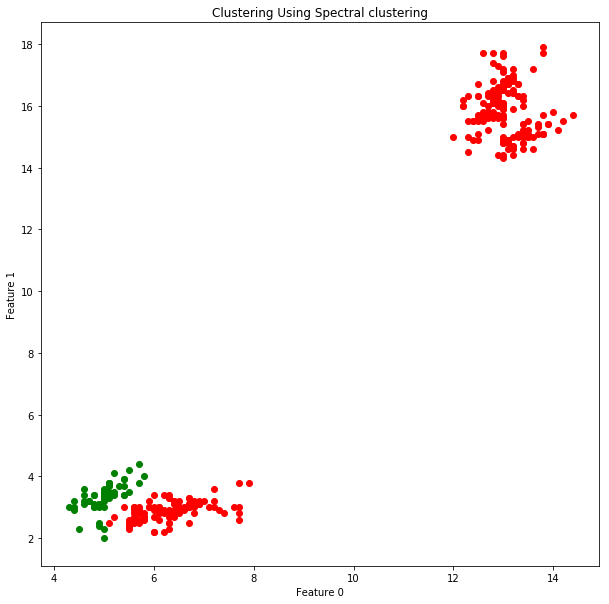

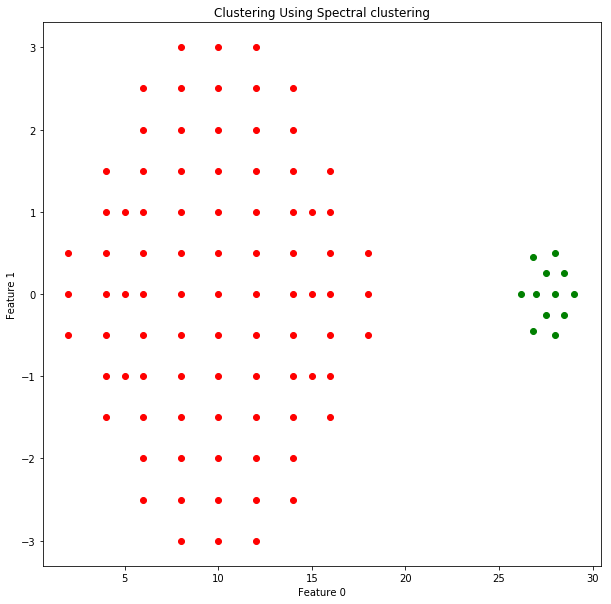

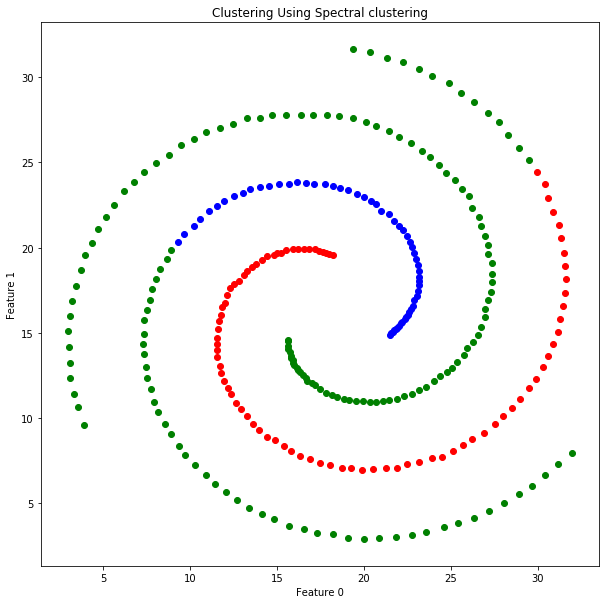

In [5]:
spec(df_1, 5, 2)
spec(df_2, 5, 2)
spec(df_3, 5, 3)